In [38]:
import pandas as pd
import numpy as np
from src import soporte as sp

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [39]:
df = pd.read_csv("data/union_tablas.csv", index_col=0)
df.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2017,3,14,3,17,2533,253.0,438,36,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


# FASE 2
## Visualización

### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [27]:
# agrupo los vuelos reservados por año y mes

df_año_mes = df.groupby(["Year", "Month"])["Flights Booked"].sum().reset_index()

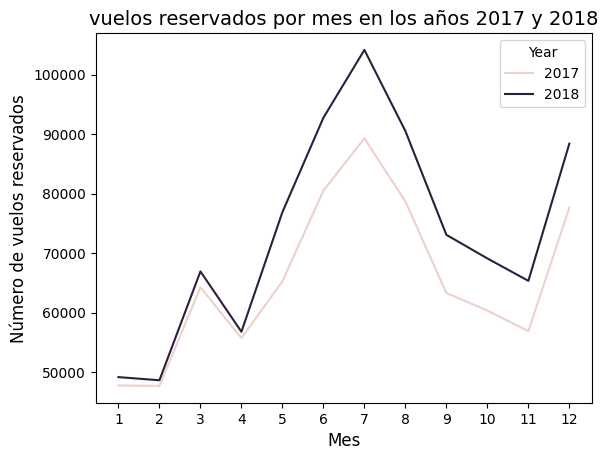

In [28]:
#El gráfico de lineas es la forma más visual de ver la diferencia, con el hue:Year, podemos ver la evolución mensual los 2 diferentes años
sns.lineplot(x="Month", 
            y="Flights Booked", 
            hue="Year", 
            data=df_año_mes)

# Personalización del gráfico
plt.title("vuelos reservados por mes en los años 2017 y 2018", fontsize=14)
plt.xticks(ticks=range(1, 13))
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Número de vuelos reservados", fontsize=12);



In [ ]:
# La gráfica sugiere que las reservas de vuelos tienen una tendencia estacional marcada, con picos en verano y diciembre, 
# y un comportamiento muy similar entre los dos años analizados, aunque las reservas en 2018 son ligeramente superiores.

### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

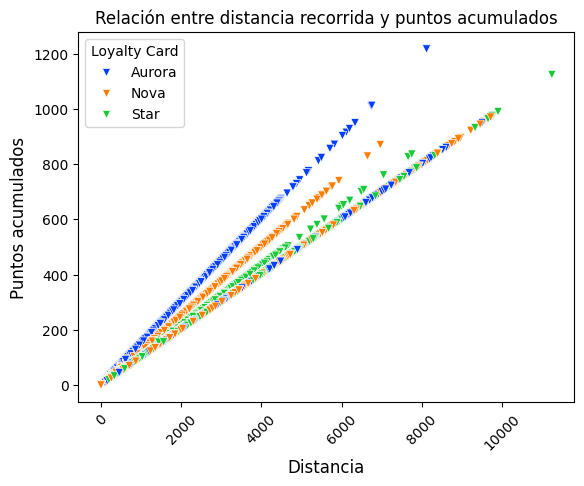

In [33]:
#Gráfica de dispersión o scatterplot para ver la relación entre la distancia de los vuelos y los puntos acumulados por los clientes

sns.scatterplot(x="Distance", 
                y="Points Accumulated", 
                hue= "Loyalty Card", 
                data=df,  
                marker= "v", 
                palette="bright")

# Personalización del gráfico
plt.title("Relación entre distancia recorrida y puntos acumulados", fontsize=12)
plt.xlabel('Distancia', fontsize=12)
plt.ylabel('Puntos acumulados', fontsize=12)
plt.xticks(rotation=45);

In [ ]:
# Esta gráfica representa la relación entre la distancia recorrida y los puntos acumulados en tres programas de lealtad diferentes: Aurora, Nova y Star.
# Se ve una clara Tendencia lineal, los puntos acumulados aumentan proporcionalmente con la distancia recorrida.
# Las diferentes tarjetas de fidelidad muestran pendientes diferenten indicando que tienen diferente tasa de acumulación de puntos por distancia recorrida, 
# La tarjeta Aurora (azul) parece ser la que premia más a sus clientes, mientras que la Star(verde) ofrece menor cantidad de puntos por distancia recorrida.

### 3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [35]:
#Agrupo los datos por provincia para contar el número de clientes en cada provincia y tener idea clara de cómo están distribuidos.

df_provincias = df.groupby("Province")["Loyalty Number"].count().reset_index().sort_values("Loyalty Number", ascending=False).reset_index(drop=True)
df_provincias

,Province,Loyalty Number
0,Ontario,129696
1,British Columbia,105816
2,Quebec,79200
3,Alberta,23256
4,Manitoba,15792
5,New Brunswick,15264
6,Nova Scotia,12432
7,Saskatchewan,9816
8,Newfoundland,6192
9,Yukon,2640


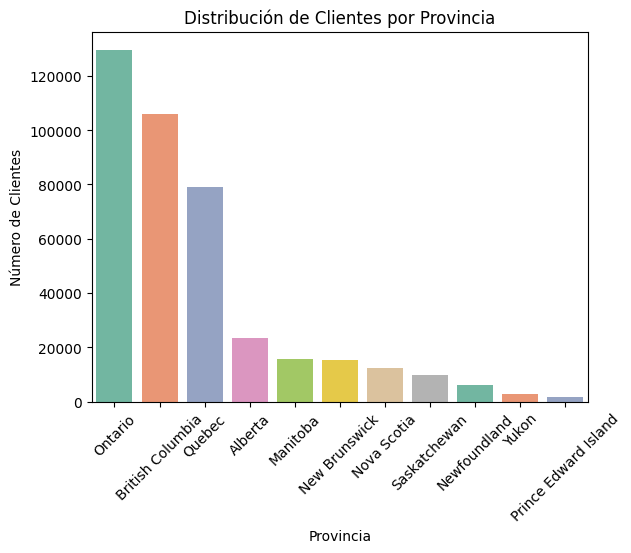

In [36]:
#El Gráfico de barras o barplot es ideal para mostrar el conteo de clientes por provincias, 
# ya que permite visualizar diferencias fácilmente.

sns.barplot(x="Province", 
            y= "Loyalty Number", 
            data=df_provincias, 
            palette='Set2')

plt.title('Distribución de Clientes por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45);

In [ ]:
# Dominancia de Ontario, British Columbia y Quebec: provincias con mayor población y aeropuertos principales
#Las provincias con menor número de clientes (Yukon, Newfoundland y Prince Edward Island), podría deberse a que tienen una población más 
# pequeña y su conectividad aerea es limitada

# Los resultados reflejan que los vuelos nacionales e internacionales probablemente se concentran en las provincias con 
# grandes aeropuertos y economías más activas.

### 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [45]:
# Agrupo por educación y promedio de salario
salario_promedio = df.groupby("Education")["Salary"].mean().reset_index().sort_values("Salary", ascending=False).reset_index(drop=True)
salario_promedio

,Education,Salary
0,Doctor,178608.897820
1,Master,103757.848425
2,Bachelor,72577.254415
3,College,71660.562672
4,High School or Below,61199.161125


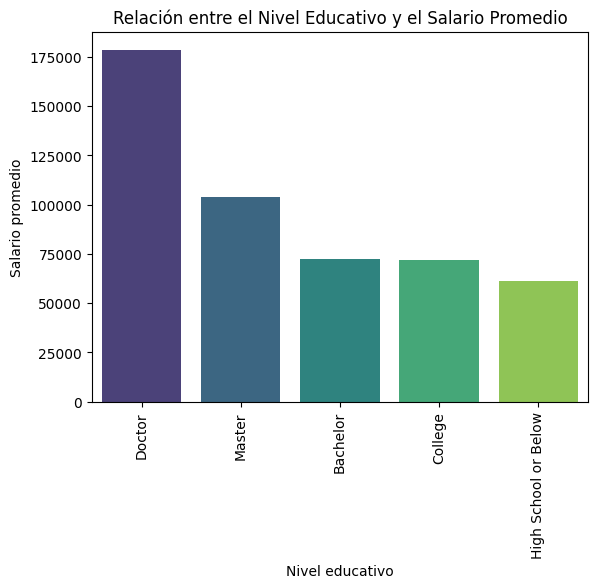

In [54]:
sns.barplot(x="Education", 
            y= "Salary", 
            data=salario_promedio, 
            palette="viridis")

plt.title("Relación entre el Nivel Educativo y el Salario Promedio")
plt.xlabel("Nivel educativo")
plt.ylabel("Salario promedio")
plt.xticks(rotation=90);

In [42]:
# El gráfico sugiere que existe una correlación positiva entre el nivel educativo y el salario promedio. 
# A medida que el nivel educativo aumenta, el ingreso promedio también lo hace, destacándose especialmente 
# los grados de "Doctor" y "Master" como los más rentables, siendo el nivel educativo Doctor el que supera 
# con gran ventaja los 175.000$ con respecto al resto.

### 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [46]:
#contamos cuantos clientes hay por cada tipo de tarjeta de fidelidad

fidelidad = df["Loyalty Card"].value_counts().reset_index()
fidelidad

,Loyalty Card,count
0,Star,183288
1,Nova,136104
2,Aurora,82296


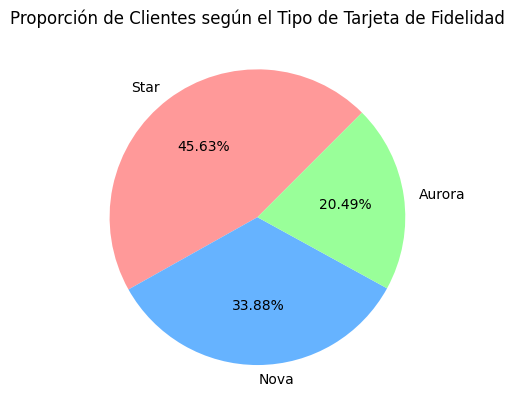

In [56]:
plt.pie("count", 
        labels="Loyalty Card", 
        data=fidelidad, 
        autopct=  '%1.2f%%', 
        startangle=45, 
        colors=['#ff9999','#66b3ff','#99ff99'])
# Personalización del gráfico
plt.title("Proporción de Clientes según el Tipo de Tarjeta de Fidelidad", fontsize=12);

In [ ]:
# La tarjeta Star domina el mercado de clientes, seguida por la Nova, mientras que la Aurora es la menos utilizada.
# Esto puede deberse a diferencias en beneficios, accesibilidad o costos asociados a cada tarjeta. 

### 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [48]:
df_marital = df.groupby(["Marital Status", "Gender"])["Loyalty Number"].count().reset_index()
df_marital

,Marital Status,Gender,Loyalty Number
0,Divorced,Female,30456
1,Divorced,Male,29976
2,Married,Female,116856
3,Married,Male,116784
4,Single,Female,54528
5,Single,Male,53088


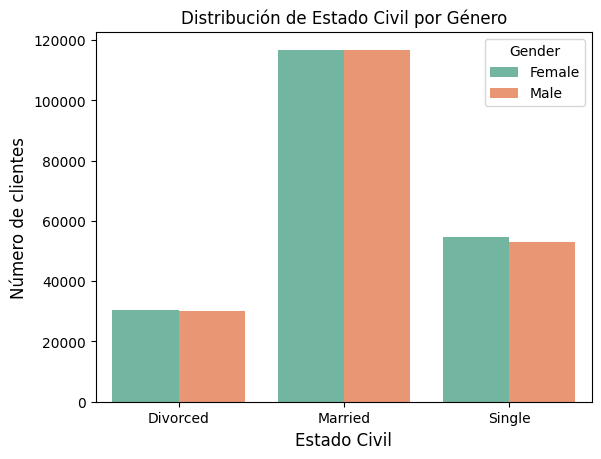

In [63]:
sns.barplot(x='Marital Status', 
            y="Loyalty Number", 
            hue='Gender', 
            data=df_marital, 
            palette="Set2",
            annotate=)
# Personalización del gráfico
plt.title('Distribución de Estado Civil por Género', fontsize=12)
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12);

In [53]:
# El gráfico muestra una diferencia significativa entre los clientes Casados en proporción con los otros estados civiles. 
# En cambio no se aprecia diferencia entre géneros. la cantidad de hombres y mujeres casados parece igual.
# El estado civil: soltero, es el segundo grupo más representado en términos de números de clientes, aunque 
# hay una ligera diferencia entre géneros, están relativamente equilibrados. 
# El grupo con la menor cantidad de clientes es el de estado civil: divorciado. 
# Tampoco se observa una diferencia significativa entre géneros